In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
url_segment_data = 'https://raw.githubusercontent.com/Hitriihoma/Xsolla_Summer_School_2020/master/segmentation.csv'
segment_0 = pd.read_csv(url_segment_data, header=0 )
segment_n = segment_0.copy(deep=True)

### Нормирование

In [3]:

#min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.StandardScaler()

x_scaled = min_max_scaler.fit_transform(segment_n[['Monetary']].values.astype(float))
segment_n['Monetary'] = x_scaled

x_scaled = min_max_scaler.fit_transform(segment_n[['Frequency']].values.astype(float))
segment_n['Frequency'] = x_scaled

segment_n.Recency = pd.to_datetime(segment_n.Recency)
segment_n['Recency2'] = segment_n.apply(lambda row: (segment_n.Recency.max() - row.Recency), axis=1)
segment_n.Recency2 = segment_n.Recency2.dt.days
x_scaled = min_max_scaler.fit_transform(segment_n[['Recency2']].values.astype(float))
segment_n['Recency2'] = x_scaled

x_scaled = min_max_scaler.fit_transform(segment_n[['factor_1']].values.astype(float))
segment_n['factor_1'] = x_scaled

x_scaled = min_max_scaler.fit_transform(segment_n[['factor_2']].values.astype(float))
segment_n['factor_2'] = x_scaled

x_scaled = min_max_scaler.fit_transform(segment_n[['factor_3']].values.astype(float))
segment_n['factor_3'] = x_scaled

x_scaled = min_max_scaler.fit_transform(segment_n[['factor_4']].values.astype(float))
segment_n['factor_4'] = x_scaled

In [4]:
segment = segment_n.copy(deep=True)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(segment[['Monetary' ,'Frequency','factor_1', 'factor_2' ,'factor_3' , 'factor_4', 'Recency2']].values)
segment['pca-one'] = pca_result[:,0]
segment['pca-two'] = pca_result[:,1] 
segment['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.2651838  0.14558684 0.14350635 0.1418586  0.14068436]


### Кластеризация пространства компонент

In [5]:
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
segment['pca-one'] = pca_result[:,0]
segment['pca-two'] = pca_result[:,1] 
segment['pca-three'] = pca_result[:,2]
segment['pca-four'] = pca_result[:,3]
segment['pca-five'] = pca_result[:,4]

X = segment[['pca-one', 'pca-two', 'pca-three', 'pca-four', 'pca-five']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

### Заносим в датафрейм разделение по кластерам

In [6]:
segment['kmeans_p'] = segment.apply(lambda row: kmeans.predict([row[['pca-one', 'pca-two', 'pca-three', 'pca-four', 'pca-five']]]), axis=1)
segment['kmeans_p'] = segment['kmeans_p'].astype(int)

### Визуализация кластеризации

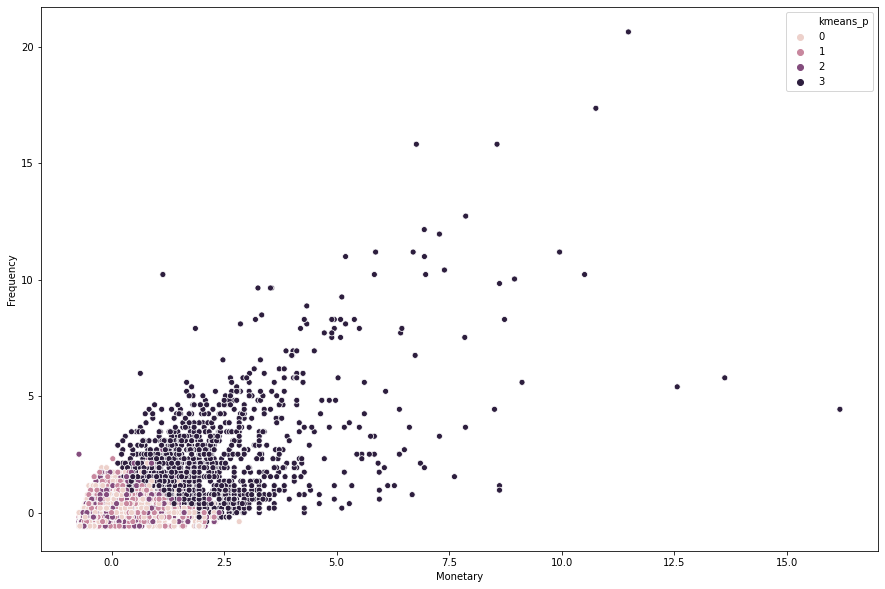

In [7]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=segment, x='Monetary', y='Frequency', hue='kmeans_p')

### Средние значения факторов в кластерах

In [8]:
segment_0['kmeans_p'] = segment['kmeans_p']
for i in np.sort(segment_0['kmeans_p'].unique()):
    print(f'Кластер {i}')
    print( 'factor_1', segment_0[segment['kmeans_p'] == i].factor_1.mean() )
    print( 'factor_2', segment_0[segment['kmeans_p'] == i].factor_2.mean() )
    print( 'factor_3', segment_0[segment['kmeans_p'] == i].factor_3.mean() )
    print( 'factor_4', segment_0[segment['kmeans_p'] == i].factor_4.mean() )

Кластер 0
factor_1 0.48612002918642994
factor_2 0.4855527179861364
factor_3 0.1932027961125208
factor_4 0.5164860261890436
Кластер 1
factor_1 0.23110480943738607
factor_2 0.5206873865698736
factor_3 0.6889762738510153
factor_4 0.5077919843543433
Кластер 2
factor_1 0.7742542628966085
factor_2 0.4896460176991153
factor_3 0.6688907692969452
factor_4 0.4689618043960144
Кластер 3
factor_1 0.4938320920785379
factor_2 0.5012186865267442
factor_3 0.49566356874392786
factor_4 0.49587477982800743


### Информация в факторах
factor_2, factor_4 не несут информации

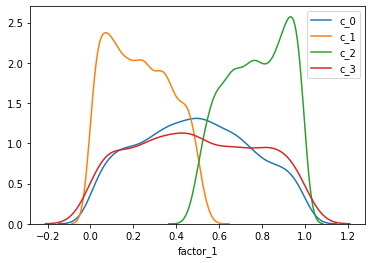

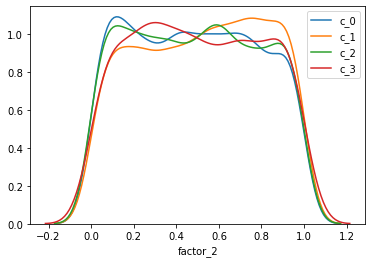

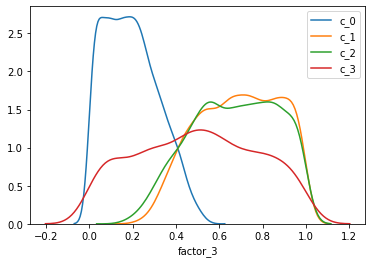

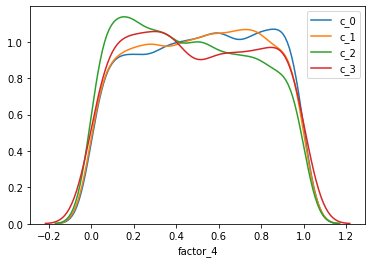

In [9]:
fig, ax = plt.subplots()
sns.distplot(segment_0[segment_0['kmeans_p'] == 0].factor_1, hist=False, ax=ax, label='c_0')
sns.distplot(segment_0[segment_0['kmeans_p'] == 1].factor_1, hist=False, ax=ax, label='c_1')
sns.distplot(segment_0[segment_0['kmeans_p'] == 2].factor_1, hist=False, ax=ax, label='c_2')
sns.distplot(segment_0[segment_0['kmeans_p'] == 3].factor_1, hist=False, ax=ax, label='c_3')
plt.show()
fig2, ax2 = plt.subplots()
sns.distplot(segment_0[segment_0['kmeans_p'] == 0].factor_2, hist=False, ax=ax2, label='c_0')
sns.distplot(segment_0[segment_0['kmeans_p'] == 1].factor_2, hist=False, ax=ax2, label='c_1')
sns.distplot(segment_0[segment_0['kmeans_p'] == 2].factor_2, hist=False, ax=ax2, label='c_2')
sns.distplot(segment_0[segment_0['kmeans_p'] == 3].factor_2, hist=False, ax=ax2, label='c_3')
plt.show()
fig3, ax3 = plt.subplots()
sns.distplot(segment_0[segment_0['kmeans_p'] == 0].factor_3, hist=False, ax=ax3, label='c_0')
sns.distplot(segment_0[segment_0['kmeans_p'] == 1].factor_3, hist=False, ax=ax3, label='c_1')
sns.distplot(segment_0[segment_0['kmeans_p'] == 2].factor_3, hist=False, ax=ax3, label='c_2')
sns.distplot(segment_0[segment_0['kmeans_p'] == 3].factor_3, hist=False, ax=ax3, label='c_3')
plt.show()
fig4, ax4 = plt.subplots()
sns.distplot(segment_0[segment_0['kmeans_p'] == 0].factor_4, hist=False, ax=ax4, label='c_0')
sns.distplot(segment_0[segment_0['kmeans_p'] == 1].factor_4, hist=False, ax=ax4, label='c_1')
sns.distplot(segment_0[segment_0['kmeans_p'] == 2].factor_4, hist=False, ax=ax4, label='c_2')
sns.distplot(segment_0[segment_0['kmeans_p'] == 3].factor_4, hist=False, ax=ax4, label='c_3')
plt.show()
plt.close('all')

### Какие кластеры выделены
|  Кластер | factor_1  | factor_3  | 
|---|---|---|
|  0 | среднее  | низкое  |
|  1 |  низкое | высокое  |
| 2  | высокое  | высокое  |
| 3  |  среднее | среднее  |

### Почему:
1. Выбор алгоритма - потмоу что ноутбук его тянет
2. Количество кластеров - пробовал разные значение, смотрел по факторам как расходится